<a href="https://colab.research.google.com/github/etckanikama/practice-repository/blob/main/zero4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ゼロから作るDeepLearning1の４章

参考URL：https://qiita.com/tatelabo/items/5982fb3e699361eb9772

In [ ]:
# 損失関数：nnの性能の悪さの指標を表してくれる。これによって重みパラメータを決めることができる
# 二乗和誤差：損失関数の手法の一つ

import numpy as np
# 二乗和誤差の式を関数化
def mean_squared_error(y, t):
  return 0.5 * np.sum((y - t) ** 2)



In [ ]:
# 2の確率が高い場合
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [ ]:
# 7の確率が高い場合
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

In [ ]:
# 上の結果から一つ目の例のほうが損失関数が小さい
# つまり、一つ目の結果のほうが教師データにより適合していることを指している

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, t_train), (x_test, t_test) = mnist.load_data()

t_train = to_categorical(t_train)
x_train = x_train.reshape(60000, 784)
print(x_train.shape)
print(t_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(60000, 10)


In [ ]:
# 訓練データの中からランダムに10枚だけ抜き出すには、どうすればよいか
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
# print(batch_mask)

In [ ]:
# 損失関数→交差エントロピー誤差の実装（バッチ対応版）
# y:ニューラルネットの出力、t: 教師データ
def cross_entropy_error(y,t):
  # yの次元数が1だった時。
  # つまりデータ一つあたりの交差エントロピー誤差を求める場合はデータの形状を変形させる
  if y.ndim == 1: 
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [ ]:
# 悪い実装例（微分）
def numerical_diff_aku(f, x):
  h = 10e-50
  return (f(x+h) - x(x)) / h

In [ ]:
np.float32(1e-50)

0.0

In [ ]:
# 中心差分：x-h,x+hによってxでの微分を求める
def numerical_diff(f,x):
  h = 1e-4 #丸め誤差を考えるとこの大きさでok
  return (f(x+h) - f(x-h)) / (2*h)
   

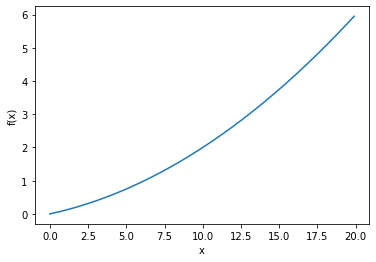

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def function_1(x):
  return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1) # 0から20までの0.1刻みのxの配列
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()


In [ ]:
# x = 5, x = 10の時で微分
numerical_diff(function_1,5)

0.1999999999990898

In [ ]:
numerical_diff(function_1,10)

0.2999999999986347

0.1999999999990898


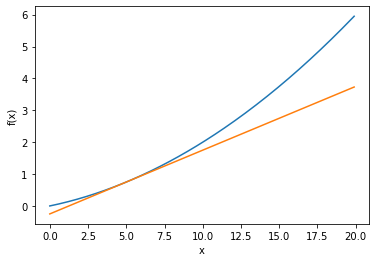

In [ ]:
# 関数の接線を直線で描画
import numpy as np
import matplotlib.pyplot as plt

def numerical_diff(f,x):
  h = 1e-4 # 0.0001
  return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
  return 0.01*x**2 + 0.1*x

# 関数を返す関数：lamda 引数：処理
def tangent_line(f,x):
  d = numerical_diff(f,x)
  print(d)
  y = f(x) -d*x 
  return lambda t:d*t + y # 引数tを持つd*t + yを返す関数

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

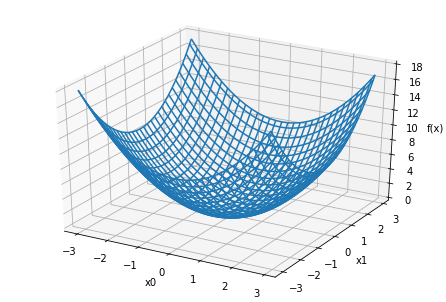

In [ ]:
# 偏微分
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
# この関数のグラフを描画
def function_2(x0,x1):
  return x0**2 + x1**2

x0 = np.arange(-3.0,3.0,0.1)
x1 = np.arange(-3.0,3.0,0.1)

X0,X1 = np.meshgrid(x1,x1) #3行3列のX0,X1の格子を作成
Y = function_2(X0,X1)

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_zlabel("f(x)")

ax.plot_wireframe(X0,X1,Y)
plt.show()

In [ ]:
# x0=3,x1=4の時 のx0に関する偏微分 round f / round x0

def function_tmp1(x0):
  return x0 * x0 + 4.0 ** 2.0

numerical_diff(function_tmp1,3.0)

6.00000000000378

In [ ]:
# x1に関する偏微分
def function_tmp2(x1):
  return 3.0**2.0 + x1 * x1
numerical_diff(function_tmp2,4.0)

7.999999999999119

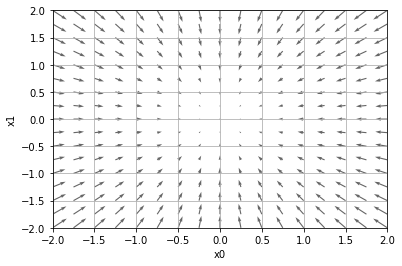

In [32]:
# 勾配の実装：すべての変数の偏微分をベクトルとしてまとめたもの
# 勾配は各地点において低くなる方向を指す→関数の値を最も減らす方向である

import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

In [35]:
# 勾配降下法：f(x0,x1) = x0^2 + x1^2の時の最小値を勾配法で求める
# 学習率(learning rage:lr)は前もって0.01などに決めておく必要がある

def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  print(x)
  for i in range(step_num):
    grad = numerical_gradient(f,x) #勾配を求める
    x -= lr *grad #勾配法の計算：値の更新
  
  return x

def function_2(x):
  return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])#初期値(-3,4)として勾配法を使って最小値を探索する
gradient_descent(function_2, init_x, lr=0.1, step_num=100)#最終的な結果を表示する


[-3.  4.]


array([-6.11110793e-10,  8.14814391e-10])

In [38]:
# 学習率は大きすぎても小さすぎてもよくないという話
# 大きすぎる場合:大きな値へと発散してしまう
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x, lr=1, step_num=100)#最終的な結果を表示する


[-3.  4.]


array([-3.,  4.])

In [40]:
# 小さすぎる場合：ほとんど更新されずに終わってしまう
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x, lr=1e-10, step_num=100)

[-3.  4.]


array([-2.99999994,  3.99999992])

学習率のようなパラメーターのことをハイパーパラメーターと呼ぶ。これはNNのパラメータである重みやバイアスとは性質の異なるものだから。

パラメーターは訓練データと学習アルゴリズムによって自動で決まる。
ハイパーパラメーターは人の手でいろいろ試す必要がある。


In [41]:
# ニューラルネットワークにおける勾配：
# ソフトマックス関数とクロスエントロピー誤差と偏微分を求めるメソッドを用意する

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# 多次元配列に対応するために少し変更
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad

In [56]:
# 上記メソッドを用いて勾配を求める
import numpy as np

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3) #ガウス分布で初期化:形状が2x3の重みになっている
    #ガウス分布（標準正規分布）は平均0,標準偏差1の正規分布であり、平均が0になる範囲のランダムな数値を出力している
    # 0に近い数値が出力されやすく、値が-1~+1に偏っている
  
  def predict(self, x):
    return np.dot(x, self.W)
  
  # x：入力データ, t:正解ラベル
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y,t)

    return loss
# 入力データ
x = np.array([0.6,0.9])
# 正解ラベル
t = np.array([0,0,1])

net = simpleNet()
print("weight")
print(net.W)
print("predict")
p = net.predict(x)
print(p)
# 最大値のインデックスを表示
print(np.argmax(p))

print("loss")
print(net.loss(x,t))

print("gradient")
# 勾配を求める：numerical_gradient(f,x)を使って求める
f = lambda w: net.loss(x,t)
dw = numerical_gradient(f, net.W)
print(dw)


weight
[[-0.94048868 -0.81929828 -0.77334112]
 [-1.22812715 -0.82545896 -0.31244635]]
predict
[-1.66960765 -1.23449203 -0.74520639]
2
loss
0.6980514807266133
gradient
[[ 0.11844829  0.1830194  -0.30146769]
 [ 0.17767244  0.27452909 -0.45220153]]


学習アルゴリズムの実装

**step1: ミニバッチ**

訓練データの中からランダムに一部のデータを選び出す。その選ばれたデータをmにバッチといい、ここでは
そのミニバッチの損失関数の値を減らすことを目的とする

**step2: 勾配の算出**

ミニバッチのの損失関数を減らすために、各重みパラメータの勾配を求める。勾配は損失関数の値を最も減らす方向を示す。

**step3: パラメータの更新（勾配降下法：今回はミニバッチによる勾配降下法なので確率的勾配降下法と呼ばれる）**

重みパラメータを勾配方向に微小量だけ更新する

**step4: 繰り返し**

step1,step2,step3を繰り返す



In [59]:
# 二層ニューラルネットワーク
class TwoLayerNet:
  # 引数：入力層のニューロンの数(784)、隠れ層のニューロンの数(50)、出力層のニューロンの数(10)
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 重みの初期化
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) #input_size x hidden_size の大きさの-1~1の乱数をwとする
    self.params['b1'] = np.zeros(hidden_size) #0を要素とするhidden_sizeの大きさの配列
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  # 推論を行う。xは画像データ
  def predict(self, x):
    W1,W2 = self.params['W1'],self.params['W2']
    b1,b2 = self.params['b1'],self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y
  
  # 損失関数を求める：x:画像データ,t:正解ラベル、
  def loss(self, x, t):
    # 結局：内積計算の和→ソフトマックス関数に入れたのが出力→出力と正解データで損失関数を求める流れ
    y = self.predict(x)
    return cross_entropy_error(y, t)

  #認識精度を求める 
  def accuracy(self, x, t):
      y = self.predict(x)
      y = np.argmax(y, axis=1)#1次元を軸として最大値のインデックスを見つける
      t = np.argmax(t, axis=1)
      
      accuracy = np.sum(y == t) / float(x.shape[0])
      return accuracy
  # 重みパラメータに対する勾配を求める
  def numerical_gradient(self, x, t):
      loss_W = lambda W: self.loss(x, t)
      
      grads = {}
      grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
      grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
      grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
      grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
      
      return grads

  # # numerical_gradient()の高速版
  # def gradient(self, x, t):

  #   # forward

  #   # backward



In [61]:
def sigmoid(x):
  return 1 /(1 + np.exp(-x))

def sigmoid_grad(x):
  return (1.0 - sigmoid(x)) * sigmoid(x)

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import  to_categorical

# データの読み込み
(x_train, t_train), (x_test, t_test) = mnist.load_data()

train_loss_list = []


x_train = x_train.reshape(60000, 784)
print(x_train.shape)
# print(t_train[0])
# t_train = to_categorical(t_train) #one-hotベクトルに変換する
# print(t_train[0])
x_test = x_test.reshape(10000, 784)
# t_test = to_categorical(t_test)
print(x_test.shape)



# 以下がハイパーパラメーター：人の手で入力するパラメーター
iters_num = 10000  # 繰り返しの回数を適宜設定する（イテレーション）
train_size = x_train.shape[0] #画像のデータ数
batch_size = 100
learning_rate = 0.1


net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
# train_acc_list = []
# test_acc_list = []

# iter_per_epoch = max(train_size / batch_size, 1)

# net.params['W1'].shape
# net.params['b1'].shape

# iters_num = 10000回繰り返して学習する
for i in range(iters_num):
  # ミニバッチの取得
  

(60000, 784)
(10000, 784)
